In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

#Comparison of Test Losses for different models

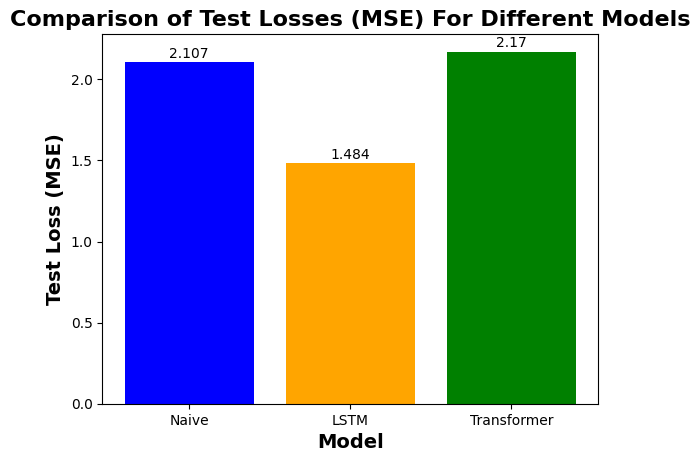

In [10]:
# Data
models = ['Naive', 'LSTM', 'Transformer']
test_losses = [2.107, 1.484, 2.170]

# Create bar plot
fig, ax = plt.subplots()
bars = ax.bar(models, test_losses, color=['blue', 'orange', 'green'])

# Add title and labels
ax.set_title('Comparison of Test Losses (MSE) For Different Models', fontsize=16, fontweight='bold')
ax.set_ylabel('Test Loss (MSE)', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=14, fontweight='bold')

# Add legend
#ax.legend(bars, models, title='Models')


for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

# Show plot
plt.show()


# Validation Losses Transformer Setups

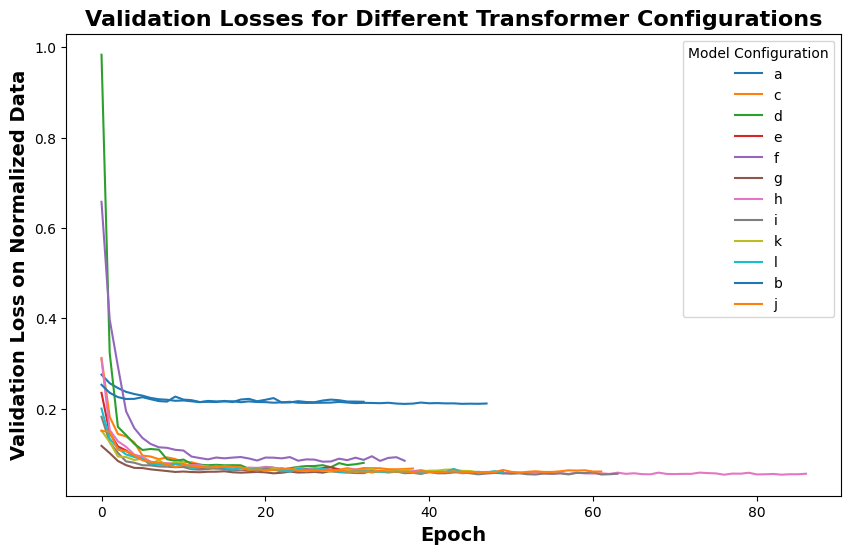

In [8]:

# Directory containing the CSV files
directory = "/content/drive/MyDrive/DeepLearning_2024/DL2024_project/results/transformer/train_val_losses"
results_path = "/content/drive/MyDrive/DeepLearning_2024/DL2024_project/results/transformer/"

# Initialize a dictionary to store dataframes
dfs = {}

# Read all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        dfs[filename] = df

# Initialize the plot
plt.figure(figsize=(10, 6))

# Iterate over the dataframes and plot the "validation_loss" column
for filename, df in dfs.items():
    if 'val_loss' in df.columns:
        # Get the 10th letter of the file name
        label = filename[32] if len(filename) > 32 else 'Unknown'
        plt.plot(df['val_loss'], label=label)

# Add legend and labels
plt.legend(title='Model Configuration')
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Validation Loss on Normalized Data', fontsize=14, fontweight='bold')
plt.title('Validation Losses for Different Transformer Configurations', fontsize=16, fontweight='bold')
plt.savefig(f"{results_path}_transformer_val_losses.png")
# Show plot
plt.show()
